In [ ]:
# Enhancing Lung Sound Classification Using Transfer Learning with ResNet50.
# Berikut langkah-langkah yang dilakukan pada penelitian lung sounds.
# 1. Pengumpulan Dataset:
#    Lokasi: /content/drive/MyDrive/Combination Dataset/Dataset
#    Label dataset: Rhonchi, Crackles
# Jumlah file di folder Rhonchi : 52   (sumber mendeley data)
# Jumlah file di folder Crackles : 257 (sumber ICBHI)
# Jumlah kelas: 2
# 2. Pra-pemrosesan:
#    a. Konversi Data Audio ke representasi tensor-float
#    b. Frekuensi sampling dengan target sampling rate sebesar 16 kHz (untuk mencapai keseragaman dan standarisasi).
#    c. Transformasi ke Mel Spectrogram
# 3. Augmentasi data dari Google Brain's SpecAugment".
# Hasil :
# Jumlah data untuk 1_Crackles : 514
# Jumlah data untuk 2_Rhonchi: 514
# 4. 10 Fold Cros Validation
# 5. Menjalankan menggunakan Transfer Learning with Model ResNet50
# evaluasi metrik seperti accuracy, precision, recall, f1_score, auc dan confusion matrix.
#===============================================================================================================================================


In [ ]:
#Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install librosa
import librosa
import soundfile as sf
!pip install soundfile
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
#import pywt
from scipy import signal
!pip install tensorflow tensorflow_hub librosa scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Load packgae drive
from google.colab import drive

In [ ]:
 # Memberikan akses kepada Colab / Autorization
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Menentukan path untuk masing-masing folder
path_crackles = os.path.join(direktori_utama, "1_Crackles")
path_rhonchi = os.path.join(direktori_utama, "2_Rhonchi")

# Mendefinisikan label
labels = ["1_Crackles", "2_Rhonchi"]
num_classes = len(labels)

# Mendapatkan daftar file di masing-masing folder
file_Crackles = os.listdir(path_crackles)
file_Rhonchi = os.listdir(path_rhonchi)

# Menampilkan jumlah file di masing-masing folder
print("Jumlah file di folder Crackles:", len(file_Crackles))
print("Jumlah file di folder Rhonchi:", len(file_Rhonchi))

# Menampilkan jumlah kelas
print("Jumlah kelas:", num_classes)


Jumlah file di folder Crackles: 257
Jumlah file di folder Rhonchi: 52
Jumlah kelas: 2


In [ ]:
# Menampilkan sinyal suara paru-paru Crackles
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Combination Dataset/Dataset/1_Crackles/Crackles_I1.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Crackles')
plt.show()

In [ ]:
# Menampilkan sinyal suara paru-paru Rhonchi
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Mengatur path file
file_path = '/content/drive/MyDrive/Combination Dataset/Dataset/2_Rhonchi/Rhonchi_10_FHI.wav'

# Membaca file audio
signal, sr = librosa.load(file_path, sr=None)  # sr=None untuk memastikan menggunakan sample rate asli

# Menghitung waktu (dalam detik) untuk setiap sampel
times = np.arange(len(signal)) / sr

# Membuat plot
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.title('Lung Sound - Rhonchi')
plt.show()

In [ ]:
# Konversi Data Audio ke representasi tensor-float
import os
import librosa
import numpy as np

def convert_audio_to_tensor_float(input_dir, output_dir, folders):
    for folder in folders:
        input_path = os.path.join(input_dir, folder)
        output_path = os.path.join(output_dir, folder)

        if not os.path.exists(input_path):
            print(f"[SKIP] Folder tidak ditemukan: {input_path}")
            continue

        os.makedirs(output_path, exist_ok=True)

        success_count = 0
        fail_count = 0

        for filename in os.listdir(input_path):
            if filename.lower().endswith('.wav'):
                file_path = os.path.join(input_path, filename)

                try:
                    # Load audio
                    audio_data, sr = librosa.load(file_path, sr=None)
                    audio_tensor = np.array(audio_data, dtype=np.float32)

                    # Save as .npy
                    output_file_path = os.path.join(output_path, filename.replace('.wav', '.npy'))
                    np.save(output_file_path, audio_tensor)

                    success_count += 1
                    print(f"[OK] {folder}/{filename} -> {success_count}")
                except Exception as e:
                    fail_count += 1
                    print(f"[ERROR] Gagal memproses {folder}/{filename}: {e}")

        print(f"\n📂 Folder {folder}: Sukses {success_count}, Gagal {fail_count}\n")

# Path input/output dan daftar folder
input_dir = "/content/drive/MyDrive/Combination Dataset/Dataset"
output_dir = "/content/drive/MyDrive/Combination Dataset/A_Konversi Data Audio ke representasi tensor-float"
folders = ["1_Crackles", "2_Rhonchi"]

# Menjalankan proses konversi
convert_audio_to_tensor_float(input_dir, output_dir, folders)

print("✅ Proses konversi selesai untuk semua folder.")


In [ ]:
# Menampilkan Jumlah file audio yang berhasil dikonversi ke representasi tensor-float
import os

def count_converted_files(output_root, folders):
    total_count = 0
    for folder in folders:
        folder_path = os.path.join(output_root, folder)

        if not os.path.exists(folder_path):
            print(f"[ERROR] Folder tidak ditemukan: {folder_path}")
            continue

        file_count = len([f for f in os.listdir(folder_path) if f.endswith('.npy')])
        total_count += file_count

        print(f"{folder}: {file_count} file berhasil dikonversi")

    print(f"\n🔢 Total file .npy yang berhasil dikonversi dari semua folder: {total_count} file")

# Path output dan nama folder
output_root = "/content/drive/MyDrive/Combination Dataset/A_Konversi Data Audio ke representasi tensor-float"
folders = ["1_Crackles", "2_Rhonchi"]

# Hitung dan tampilkan jumlah file .npy per folder
count_converted_files(output_root, folders)


1_Crackles: 256 file berhasil dikonversi
2_Rhonchi: 52 file berhasil dikonversi

🔢 Total file .npy yang berhasil dikonversi dari semua folder: 308 file


In [ ]:
!pip install pydub
!apt-get install ffmpeg -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
# Frekuensi sampling 16kHz
import os
import librosa
import soundfile as sf
import numpy as np
from pydub import AudioSegment


def resample_audio(file_path, target_sampling_rate=16000):
    try:
        audio, original_sampling_rate = librosa.load(file_path, sr=None, mono=True)
        resampled_audio = librosa.resample(audio, orig_sr=original_sampling_rate, target_sr=target_sampling_rate)
        return resampled_audio
    except Exception as e:
        print(f"[WARN] Librosa gagal baca {file_path}, mencoba pydub...")

        try:
            audio = AudioSegment.from_file(file_path)
            audio = audio.set_channels(1).set_frame_rate(target_sampling_rate)
            samples = np.array(audio.get_array_of_samples()).astype(np.float32)
            samples /= np.iinfo(audio.array_type).max
            return samples
        except Exception as e2:
            print(f"[ERROR] Pydub juga gagal baca {file_path}: {e2}")
            return None

# Paths
base_path = "/content/drive/MyDrive/Combination Dataset/Dataset"
processed_path = "/content/drive/MyDrive/Combination Dataset/B_Frekuensi sampling 16kHz"
folders = ["1_Crackles", "2_Rhonchi"]

# Tracking
total_sukses = 0
total_gagal = 0

for folder in folders:
    input_folder = os.path.join(base_path, folder)
    output_folder = os.path.join(processed_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    audio_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.wav', '.mp3'))]
    jumlah_disampling = 0
    jumlah_dilewati = 0

    for audio_file in audio_files:
        file_path = os.path.join(input_folder, audio_file)
        output_filename = os.path.splitext(audio_file)[0] + ".wav"
        output_path = os.path.join(output_folder, output_filename)

        resampled_audio = resample_audio(file_path, target_sampling_rate=16000)
        if resampled_audio is None:
            jumlah_dilewati += 1
            continue

        sf.write(output_path, resampled_audio, 16000)
        jumlah_disampling += 1

    total_sukses += jumlah_disampling
    total_gagal += jumlah_dilewati

    print(f"\n📁 Folder '{folder}':")
    print(f"   ✅ Disampling: {jumlah_disampling}")
    print(f"   ❌ Dilewati (gagal): {jumlah_dilewati}")

print(f"\n📊 Total:")
print(f"   ✅ Berhasil: {total_sukses}")
print(f"   ❌ Gagal: {total_gagal}")


In [ ]:
# Mengubah file .wav menjadi gambar Mel Spectrogram per kelas

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # Untuk progress bar

# Direktori sumber dan tujuan
source_dir = '/content/drive/MyDrive/Combination Dataset/B_Frekuensi sampling 16kHz'
target_dir = '/content/drive/MyDrive/Combination Dataset/C_Mel Spectogram'
folders = ["1_Crackles", "2_Rhonchi"]

# Membuat folder tujuan utama jika belum ada
os.makedirs(target_dir, exist_ok=True)

def create_mel_spectrogram(file_path, save_path):
    try:
        # Load file audio
        y, sr = librosa.load(file_path)
        # Konversi ke Mel Spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        S_DB = librosa.power_to_db(S, ref=np.max)

        # Simpan sebagai gambar PNG
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.tight_layout()
        plt.savefig(save_path)
        plt.close()
    except Exception as e:
        print(f"Gagal memproses {file_path}: {e}")

# Loop tiap folder kelas
for folder in folders:
    class_source_dir = os.path.join(source_dir, folder)
    class_target_dir = os.path.join(target_dir, folder)
    os.makedirs(class_target_dir, exist_ok=True)

    # List semua file .wav dalam folder kelas
    wav_files = [f for f in os.listdir(class_source_dir) if f.endswith('.wav')]

    print(f"Memproses folder: {folder} ({len(wav_files)} file)")
    for filename in tqdm(wav_files, desc=f"Processing {folder}"):
        source_file_path = os.path.join(class_source_dir, filename)
        target_file_path = os.path.join(class_target_dir, os.path.splitext(filename)[0] + '.png')
        create_mel_spectrogram(source_file_path, target_file_path)

print("Konversi selesai.")


In [ ]:
# Menampilkan jumlah file pada kelas Mel Spectogram
import os

# Path dasar ke dataset
base_path = "/content/drive/MyDrive/Combination Dataset/C_Mel Spectogram"
folders = ["1_Crackles", "2_Rhonchi"]

# Fungsi menghitung jumlah file dalam folder
def count_files_in_folder(folder_path):
    try:
        return len([
            name for name in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, name))
        ])
    except FileNotFoundError:
        return 0

# Hitung dan tampilkan jumlah file untuk masing-masing kelas
for folder in folders:
    full_path = os.path.join(base_path, folder)
    jumlah_file = count_files_in_folder(full_path)
    print(f"Jumlah file di {folder}: {jumlah_file}")


Jumlah file di 1_Crackles: 256
Jumlah file di 2_Rhonchi: 52


In [ ]:
## Augmentasi dengan target 514
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import random

# Fungsi SpecAugment
def time_warp(spec, W=5):
    # Untuk menjaga kesederhanaan, diabaikan dulu
    return spec

def freq_mask(spec, F=30, num_masks=1):
    cloned = spec.copy()
    num_mel_channels = cloned.shape[0]
    for _ in range(num_masks):
        f = np.random.uniform(0, F)
        f_zero = int(np.random.uniform(0, num_mel_channels - f))
        cloned[f_zero:f_zero + int(f)] = 0
    return cloned

def time_mask(spec, T=40, num_masks=1):
    cloned = spec.copy()
    len_spectro = cloned.shape[1]
    for _ in range(num_masks):
        t = np.random.uniform(0, T)
        t_zero = int(np.random.uniform(0, len_spectro - t))
        cloned[:, t_zero:t_zero + int(t)] = 0
    return cloned

def spec_augment(spec, W=5, F=30, T=40, num_freq_masks=1, num_time_masks=1):
    spec = time_warp(spec, W)
    spec = freq_mask(spec, F, num_freq_masks)
    spec = time_mask(spec, T, num_time_masks)
    return spec

# Path dan parameter
input_folder = '/content/drive/MyDrive/Combination Dataset/C_Mel Spectogram'
output_folder = '/content/drive/MyDrive/Combination Dataset/D_Augmentasi data dengan SpecAugment'
folders = ["1_Crackles", "2_Rhonchi"]
target_count = 514

# Proses augmentasi per kelas
for folder in folders:
    input_class_folder = os.path.join(input_folder, folder)
    output_class_folder = os.path.join(output_folder, folder)
    os.makedirs(output_class_folder, exist_ok=True)

    # Salin semua file PNG dari input ke output
    for file_name in os.listdir(input_class_folder):
        src = os.path.join(input_class_folder, file_name)
        dst = os.path.join(output_class_folder, file_name)
        if os.path.isfile(src) and file_name.endswith('.png'):
            shutil.copy(src, dst)

    # Hitung jumlah file saat ini
    current_files = [f for f in os.listdir(output_class_folder) if f.endswith('.png')]
    current_count = len(current_files)

    # Augmentasi jika jumlah file belum mencapai target
    if current_count < target_count:
        print(f"[INFO] Augmentasi kelas {folder}: {current_count} -> {target_count}")
        while current_count < target_count:
            file_name = random.choice(current_files)
            full_file_name = os.path.join(output_class_folder, file_name)

            mel_spec = plt.imread(full_file_name)
            augmented_spec = spec_augment(mel_spec)

            new_file_name = f"aug_{current_count}.png"
            output_file = os.path.join(output_class_folder, new_file_name)

            plt.imsave(output_file, augmented_spec, cmap='viridis')
            current_count += 1

    print(f"[INFO] Total akhir file kelas {folder}: {current_count} file\n")


[INFO] Augmentasi kelas 1_Crackles: 256 -> 514
[INFO] Total akhir file kelas 1_Crackles: 514 file

[INFO] Augmentasi kelas 2_Rhonchi: 52 -> 514
[INFO] Total akhir file kelas 2_Rhonchi: 514 file



In [ ]:
!pip install tensorflow tensorflow_hub librosa scikit-learn


In [ ]:
!pip install tensorflow-hub


In [ ]:
# Transfer learning with ResNet50
# 10 Fol Cross Validation
# Setiap Fold selesai dan berhenti, jika running lagi secara manual ke fold berikutnya.
# Menampilkan Accuracy, Precision, Recall, F1-score, AUC
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image
import time

# Path dataset dan folder
data_dir = '/content/drive/MyDrive/Combination Dataset/D_Augmentasi data dengan SpecAugment'
output_dir = '/content/drive/MyDrive/Combination Dataset/E_10 Fold Cross Validation'
folders = ["1_Crackles", "2_Rhonchi"]
progress_file = os.path.join(output_dir, 'progress.txt')

def load_dataset(data_dir, folders):
    X, y = [] , []
    for label, folder in enumerate(folders):
        folder_path = os.path.join(data_dir, folder)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = np.array(img)
                img_array = preprocess_input(img_array)
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
    return np.array(X), np.array(y)

def build_finetuned_resnet(num_classes):
    base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers[-10:]:
        layer.trainable = True
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def save_progress(fold_index):
    with open(progress_file, 'w') as f:
        f.write(str(fold_index))

def load_progress():
    if os.path.exists(progress_file):
        with open(progress_file, 'r') as f:
            return int(f.read().strip())
    return 0

# Load dataset
X, y = load_dataset(data_dir, folders)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
num_classes = 2
last_completed_fold = load_progress()
metrics = {'fold': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'confusion_matrix': []}

start_time = time.time()
fold_index = 1
for train_idx, val_idx in kf.split(X):
    if fold_index <= last_completed_fold:
        fold_index += 1
        continue

    print(f'Starting Fold {fold_index}...')
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=32, shuffle=True)
    val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=32, shuffle=False)

    model = build_finetuned_resnet(num_classes=num_classes)

    callbacks = [
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
        ModelCheckpoint(filepath=os.path.join(output_dir, f'best_model_fold_{fold_index}.h5'), save_best_only=True)
    ]

    history = model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=callbacks)

    y_pred = np.argmax(model.predict(X_val), axis=1)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_val, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_val, y_pred)

    metrics['fold'].append(fold_index)
    metrics['accuracy'].append(acc)
    metrics['precision'].append(prec)
    metrics['recall'].append(rec)
    metrics['f1_score'].append(f1)
    metrics['confusion_matrix'].append(cm)

    print(f"Fold {fold_index} - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")

    plt.figure(figsize=(6, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Crackles", "Rhonchi"])
    disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
    plt.title(f'Confusion Matrix for Fold {fold_index}')
    plt.show()

    model.save(os.path.join(output_dir, f'model_fold_{fold_index}.h5'))
    save_progress(fold_index)
    print(f"Fold {fold_index} selesai. Progres disimpan.")

    fold_index += 1

# Simpan ke CSV
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv(os.path.join(output_dir, 'cross_validation_metrics.csv'), index=False)

print("Cross-validation selesai.")
end_time = time.time()
print(f"\nTotal waktu eksekusi: {end_time - start_time:.2f} detik")


In [ ]:
!pip install --upgrade tensorflow


In [ ]:
!pip install tensorflow-io
import tensorflow_io as tfio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 26.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/usr/local/lib/python3.11/dist-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZN3tsl7strings13safe_strtou64ESt17basic_string_viewIcSt11char_traitsIcEEPm']
  warnings.warn(

✅ Loading model from last checkpoint...
🔁 Resuming from epoch 3
Epoch 4/75


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 734s 27s/step - accuracy: 0.8988 - loss: 0.2857 - val_accuracy: 0.8883 - val_loss: 0.3325 - learning_rate: 5.0000e-05
Epoch 5/75
26/26 ━━━━━━━━━━━━━━━━━━━━ 718s 28s/step - accuracy: 0.8995 - loss: 0.2582 - val_accuracy: 0.9272 - val_loss: 0.2308 - learning_rate: 5.0000e-05
Epoch 6/75
26/26 ━━━━━━━━━━━━━━━━━━━━ 708s 27s/step - accuracy: 0.9490 - loss: 0.1528 - val_accuracy: 0.9369 - val_loss: 0.1714 - learning_rate: 5.0000e-05
Epoch 7/75
26/26 ━━━━━━━━━━━━━━━━━━━━ 712s 27s/step - accuracy: 0.9385 - loss: 0.1355 - val_accuracy: 0.9563 - val_loss: 0.1141 - learning_rate: 5.0000e-05
Epoch 8/75
26/26 ━━━━━━━━━━━━━━━━━━━━ 707s 27s/step - accuracy: 0.9542 - loss: 0.1276 - val_accuracy: 0.9709 - val_loss: 0.0681 - learning_rate: 5.0000e-05
Epoch 9/75
26/26 ━━━━━━━━━━━━━━━━━━━━ 708s 27s/step - accuracy: 0.9670 - loss: 0.0809 - val_accuracy: 0.9806 - val_loss: 0.0527 - learning_rate: 5.0000e-05
Epoch 10/75
26/26 ━━━━━━━━━━━━━━━━━━━━ 712s 27s/step - accuracy: 0.9696 - l

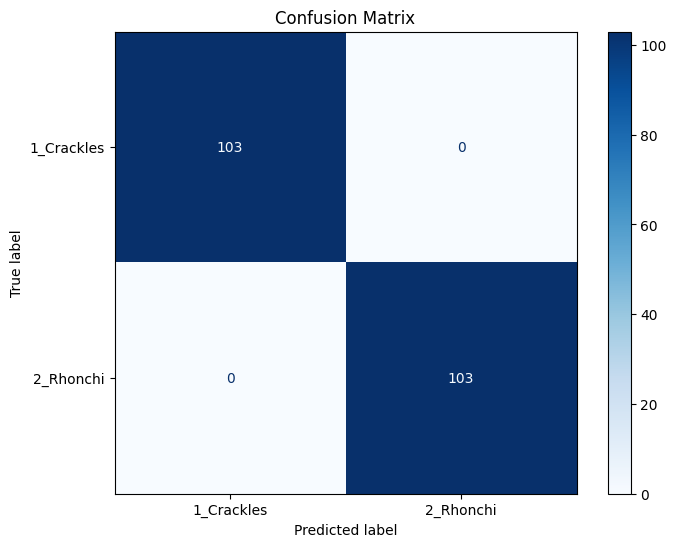

✅ Training & evaluation selesai. Model dan hasil disimpan.


In [ ]:
## Menjalankan model Transfer Learning with ResNet50, dengan pembagian data latih 80% dan data uji 20%.
# optimizer=Adamax Learning rate 0.00005
# Menampilkan Accuracy, Precision, Recall, F1-score, serta visualisasi Confusion Matrix di layar google golab.
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# Path & setup
data_dir = '/content/drive/MyDrive/Combination Dataset/D_Augmentasi data dengan SpecAugment'
folders = ["1_Crackles", "2_Rhonchi"]
output_dir = '/content/drive/MyDrive/Combination Dataset/F_Transfer Learning with ResNet50/Adamax'

model_path = os.path.join(output_dir, 'last_epoch_model.keras')
best_model_path = os.path.join(output_dir, 'best_model.keras')
final_model_path = os.path.join(output_dir, 'final_model.keras')
log_path = os.path.join(output_dir, 'training_log.csv')
os.makedirs(output_dir, exist_ok=True)

# Load image data from folders
def load_dataset(data_dir, folders):
    X, y = [], []
    for label, folder in enumerate(folders):
        folder_path = os.path.join(data_dir, folder)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                img = Image.open(file_path).convert('RGB')
                img = img.resize((224, 224))
                img_array = preprocess_input(np.array(img))
                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading image {file_name}: {e}")
    return np.array(X), np.array(y)

X, y = load_dataset(data_dir, folders)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Build ResNet50 model
def build_finetuned_resnet():
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers[-10:]:
        layer.trainable = True
    x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.6)(x)
    output = tf.keras.layers.Dense(2, activation='softmax')(x)
    model = tf.keras.Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adamax(learning_rate=5e-5),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Data generator
train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=32)
test_generator = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

# Load or build model
initial_epoch = 0
if os.path.exists(model_path):
    print("✅ Loading model from last checkpoint...")
    model = tf.keras.models.load_model(model_path)
else:
    print("🚧 No previous model found. Building new model...")
    model = build_finetuned_resnet()

# Check training log
if os.path.exists(log_path) and os.path.getsize(log_path) > 0:
    df = pd.read_csv(log_path)
    initial_epoch = len(df)
    print(f"🔁 Resuming from epoch {initial_epoch}")
else:
    print("📭 Log file is empty or not found. Starting from epoch 0.")

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-7),
    ModelCheckpoint(best_model_path, save_best_only=True),
    ModelCheckpoint(model_path, save_best_only=False),
    CSVLogger(log_path, append=os.path.exists(log_path) and os.path.getsize(log_path) > 0)
]

# Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=75,
    initial_epoch=initial_epoch,
    callbacks=callbacks
)

# Evaluation
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output metrics
print("Evaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=folders)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix')
plt.show()

# Save model and evaluation
model.save(final_model_path)
pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Value": [accuracy, precision, recall, f1]
}).to_csv(os.path.join(output_dir, 'evaluation_metrics.csv'), index=False)

print("✅ Training & evaluation selesai. Model dan hasil disimpan.")
